In [2]:
import numpy as np 
import pandas as pd 
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
#import statsmodels.api as sm # What does this do? Find out and type here.
#from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix as confusion_matrix
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
plt.style.use("ggplot")
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
pip install imbalanced-learn

In [3]:
import imblearn
print(imblearn.__version__)

0.9.1


In [4]:
red_wine = pd.read_csv('winequality-red.csv', sep=",")

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_red_wine = scaler.fit_transform(red_wine)
scaled_red_wine = pd.DataFrame(scaled_red_wine, columns=red_wine.columns) 

print(scaled_red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  
0 -0.960246 -0.787823  
1 -0.584

[Text(0.5, 1.0, 'Red wine')]

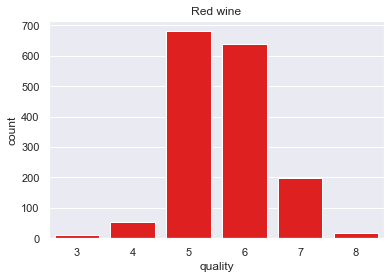

In [6]:
sns.countplot(data=red_wine, x="quality", color = 'red').set(title= "Red wine")

In [7]:
red_wine["quality"].value_counts(dropna=False, sort=True)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
ratings = [
    (red_wine['quality'] >= 7),
    (red_wine['quality'] <= 4)
]
quality = ['good', 'bad']
red_wine['quality'] = np.select(ratings, quality, default='average')
red_wine.quality.value_counts()

average    1319
good        217
bad          63
Name: quality, dtype: int64

In [9]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,average
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,average
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,average
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,average


In [10]:

dfo=red_wine.select_dtypes(include=['object']) # select object type columns
red_wine = pd.concat([red_wine.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [11]:
red_wine['quality_good']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality_good, Length: 1599, dtype: uint8

In [12]:
def getDummyLabels(label):
    if label ==  'bad':
        return 0
    elif label ==  'average':
        return 1
    elif label ==  'good':
        return 2
    else:
        return -1

In [12]:
# We do the test train split here
X = scaled_red_wine.drop(["quality"], axis = 1)
y = red_wine['quality_good']

In [22]:
y.value_counts()

0    1382
1     217
Name: quality_good, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [16]:
from sklearn.dummy import DummyClassifier
red_dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
red_dummy_classifier.fit(X_train,y_train)
red_dummy_score = red_dummy_classifier.score(X_test,y_test)
print("Dummy Score = ", red_dummy_score)

Dummy Score =  0.8645833333333334


# Use SMOTE to balance quality variable

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_train, y_train = X_res, y_res

# Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [26]:
# Model selection and model tuning
# Function for executing classifier algorithms, outputing performance metrics and the best hyperparameters for each classifier
import numpy as np


def evaluate_model(X_test, y_test, clf, parameters):
    
    print("Name of classifier: ",clf)
    
    # Instantiate an instance of GridsearchCV
    grid = GridSearchCV(clf, parameters, n_jobs = -1, scoring = 'roc_auc')
    
    # Fit the gridsearch model to the training splits - the DTM/sparse array and the target 
    grid_search = grid.fit(X_train, y_train)
    
    # Make predictions for X_test DTM/sparse array based on the best parameters.The refitted GridSearchCV estimator...
    #....is made available as the best_estimator_ attribute and permits using predict ...
    #...directly on this GridSearchCV instance. Predict produces binary classifications predictions 
    y_pred = grid_search.predict(X_test)
    
    
    # Create a confusion matrix comparing the test target values with the predicted values
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Print the best score based on the scoring method, in this case 'roc_auc'
    # Mean cross-validated score of the best_estimator
    print("Best ROC AUC score:", grid_search.best_score_) 
    
    # Print a classification report for the best model
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix:\n', cm)

    # Print the best parameters identified by gridsearching
    print("Best Parameters:", grid_search.best_params_)
    
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone2_TweetsandMusic_Predictor/5__MachineLearning.ipynb
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    

In [130]:
# Classifier algorithms for testing and their respective hyperparameter search grids
# Commented-out the search grid for random forest classisfier due to long processing time

# Algorithms to compare
LR = LogisticRegression()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()

# Search grids for classifier-specific parameters
algos_params ={LR:{'C': [0.001, 0.1, 1, 10, 100]},
              KNN:{'weights':['distance','uniform'],'n_neighbors':range(1,50)},
             RF:{'n_estimators': [100, 300, 500, 800, 1200], # comment out RF due to long processing time (~ 3 hours)
               'max_depth': [1, 5, 10, 20, 40, 80], # comment out RF due to long processing time (~ 3 hours)
                'max_features': [3,4,5,6,7,8],
              'min_samples_split': [2, 5, 10, 15, 100], # comment out RF due to long processing time (~ 3 hours)
              'min_samples_leaf': [1, 2, 5, 10]}} # comment out RF due to long processing time (~ 3 hours)

In [131]:
# Compare the performance of classifier algorithms by iteratively calling the 'evaluate_model' function on all the ...
#...classifier algorithms except random forest classifier due to lengthy process time
# Call the random forest classifier separately (below)

for k, v in algos_params.items():evaluate_model(X_test, y_test, k, v)
    




Name of classifier:  LogisticRegression()
Best ROC AUC score: 0.8644683763216857
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       415
           1       0.68      0.35      0.46        65

    accuracy                           0.89       480
   macro avg       0.79      0.66      0.70       480
weighted avg       0.87      0.89      0.87       480


Confusion Matrix:
 [[404  11]
 [ 42  23]]
Best Parameters: {'C': 0.1}
Name of classifier:  KNeighborsClassifier()
Best ROC AUC score: 0.9078038520366698
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       415
           1       0.71      0.42      0.52        65

    accuracy                           0.90       480
   macro avg       0.81      0.69      0.73       480
weighted avg       0.89      0.90      0.89       480


Confusion Matrix:
 [[404  11]
 [ 38  27]]
Best Parameters: {'n_neighbors': 40, 'weights': 'distance'}
Name of 

In [45]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [158]:
LR = LogisticRegression(C = 0.1)
LR.fit(X_train, y_train)
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
print('Logistic Regression AUC: %.4f' % LR_auc)

KNN = KNeighborsClassifier(n_neighbors= 40, weights='distance')
KNN.fit(X_train, y_train)
KNN_probs = KNN.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN_probs)
KNN_auc = roc_auc_score(y_test,KNN_probs)
print('K Nearest Neighbor AUC: %.4f' % KNN_auc)

RF = RandomForestClassifier(max_depth= 20, max_features= 3, min_samples_leaf=1, min_samples_split= 2, n_estimators=100)
RF.fit(X_train, y_train)
RF_probs = RF.predict_proba(X_test)
RF_probs = RF_probs[:, 1]
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
print('Random Forest Classifier AUC: %.4f' % RF_auc)

Logistic Regression AUC: 0.8904
K Nearest Neighbor AUC: 0.9257
Random Forest Classifier AUC: 0.9284


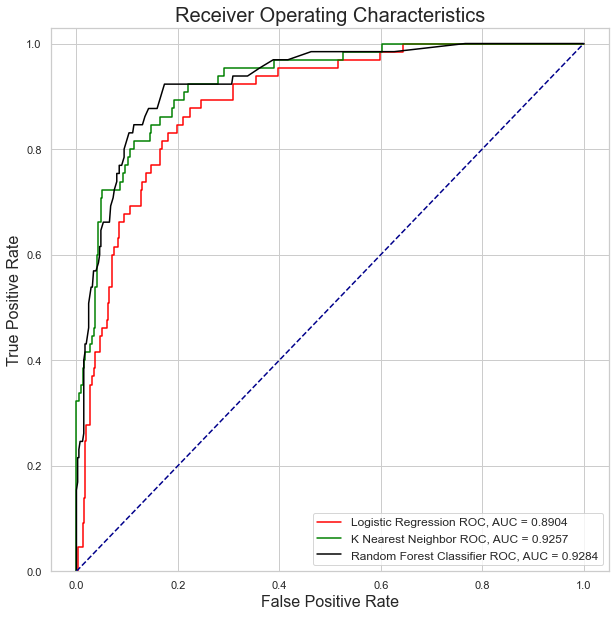

In [164]:
# Plot the roc curves for each classifier using their best hyperparameters

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
plt.plot(LR_fpr, LR_tpr, color='red', label='Logistic Regression ROC, AUC = 0.8904')
plt.plot(KNN_fpr, KNN_tpr, color='green', label='K Nearest Neighbor ROC, AUC = 0.9257')
plt.plot(RF_fpr, RF_tpr, color='black', label='Random Forest Classifier ROC, AUC = 0.9284')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title("Receiver Operating Characteristics", fontsize = 20)
plt.legend(loc='best', fontsize  = 12)
plt.xlabel("False Positive Rate", fontsize = 16)
plt.ylabel("True Positive Rate", fontsize = 16)
plt.ylim(0,1.03)
plt.savefig('capstone2_roc_auc.png')

# Reference: # https://stackabuse.com/understanding-roc-curves-with-python/


# Classification Metrics for the Random Forest Model of the Red Wine Data for Predicting Between High Quality and Low Quality Wines


In [97]:
# Use the best model - Random Forest(max_depth= 20, max_features= 5, min_samples_leaf=1, min_samples_split= 2, n_estimators=500) to make classification predictions from the test features for the sarcasm data

# Predict binary classifications for each red wine in the test features
RF_y_pred_binary = RF.predict(X_test)

# Create probabilities of each red wine being "good"
RF_y_pred = RF.predict_proba(X_test)[:,1]

In [98]:
# Metrics for the best model - Random Forest(max_depth= 20, max_features= 5, min_samples_leaf=1, min_samples_split= 2, n_estimators=500) to make classification predictions from the test features for the sarcasm data

# Accuracy
print('Accuracy: %.3f' % accuracy_score(y_true= y_test, y_pred = RF_y_pred_binary))
# Precision
print('Precision: %.3f' % precision_score(y_true= y_test, y_pred = RF_y_pred_binary))
# Recall
print('Recall: %.3f' % recall_score(y_true= y_test, y_pred = RF_y_pred_binary))
# F1 score
print('F1 Score: %.3f' % f1_score(y_true= y_test, y_pred = RF_y_pred_binary))

Accuracy: 0.915
Precision: 0.722
Recall: 0.600
F1 Score: 0.655


In [99]:
# Generate performance metrics using a classification report for the Random forest classifier for the red wine data

report_RF = classification_report(y_test, RF_y_pred_binary,output_dict=True)
# Convert the classification report dictionary into a DF
RF_df = pd.DataFrame(report_RF)
RF_df

# Reference: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

,0,1,accuracy,macro avg,weighted avg
precision,0.938967,0.722222,0.914583,0.830595,0.909616
recall,0.963855,0.600000,0.914583,0.781928,0.914583
f1-score,0.951249,0.655462,0.914583,0.803355,0.911194
support,415.000000,65.000000,0.914583,480.000000,480.000000


In [100]:
# Convert the DF with the classification report 'RF_df' for Random Forest into an excel spreadsheet for easier integration into the report

RF_df.to_excel("rf_class_report.xlsx")

In [101]:
# Calculate the f1 scores for the best model, Random Forest

RF_y_pred_binary = RF.predict(X_test)

print("f1 score, macro average:",round(f1_score(y_test, RF_y_pred_binary, average='macro'),4))
print("f1 score, micro average:",round(f1_score(y_test, RF_y_pred_binary, average='micro'),4))
print("f1 score, weighted average:",round(f1_score(y_test, RF_y_pred_binary, average='weighted'),4))

f1 score, macro average: 0.8034
f1 score, micro average: 0.9146
f1 score, weighted average: 0.9112


In [102]:
# Calculate f-beta scores for the best model,Random Forest with beta = 0.5

# The beta parameter determines the weight of recall in the combined score. With beta = 1, f1 and f-beta are equivalent. The beta ...
#...parameter determines the weight of recall in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors...
#...recall (beta -> 0 considers only precision, beta -> +inf only recall).

print("f-beta score, macro average:",round(fbeta_score(y_test, RF_y_pred_binary, average='macro',beta=0.5),4))
print("f-beta, micro average:",round(fbeta_score(y_test, RF_y_pred_binary, average='micro',beta = 0.5),4))
print("f-beta, weighted average:",round(fbeta_score(y_test, RF_y_pred_binary, average='weighted',beta =0.5),4))

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score

f-beta score, macro average: 0.8189
f-beta, micro average: 0.9146
f-beta, weighted average: 0.91


In [103]:
# Adjust the classification based on the prediction threshold

def adjusted_classes(RF_y_pred, t):
    
    return [1 if y >= t else 0 for y in RF_y_pred]

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb

In [168]:
# Classification report for the best-performing model - Random Forest with the ...
#...standard threshold (t = 0.5) into a DF

report_t5 = classification_report(y_test, adjusted_classes(RF_y_pred, t=0.5),output_dict=True)
df = pd.DataFrame(report_t5)
df.columns = ['Low Quality', 'High Quality', 'accuracy', 'macro avg', 'weighted avg']
df
# Reference: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

,Low Quality,High Quality,accuracy,macro avg,weighted avg
precision,0.938824,0.709091,0.9125,0.823957,0.907714
recall,0.961446,0.600000,0.9125,0.780723,0.912500
f1-score,0.950000,0.650000,0.9125,0.800000,0.909375
support,415.000000,65.000000,0.9125,480.000000,480.000000


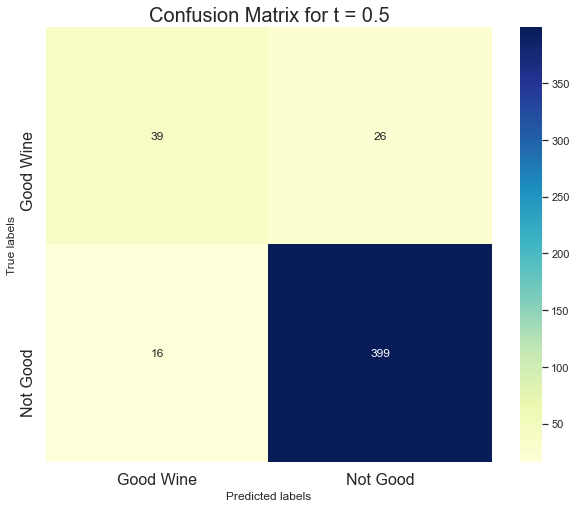

In [106]:
# Confusion matrix figure for the best-performing model - Random Forest with the ...
#...standard threshold (t = 0.5)     

matrix_t5 = confusion_matrix(y_test, adjusted_classes(RF_y_pred, t=0.5),labels=[1, 0]) # include the labels parameter produce a confusion matrix from the perpective of the sarcatsic class

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(matrix_t5, annot=True, ax = ax, fmt='g',cmap = 'YlGnBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for t = 0.5', fontsize = 20) 
ax.xaxis.set_ticklabels(['Good Wine', 'Not Good'], fontsize = 16) 
ax.yaxis.set_ticklabels(['Good Wine', 'Not Good'], fontsize = 16)
plt.savefig('cm_t5.png')

# Reference (sns heatmap): https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# Reference (sns heatmap): https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

# Threshold Analysis for the Random Forest Model - Exploring the Relationship Between Precision, Recall and Threshold Values



In [107]:
# Make binary or continuous predictions based on the best Random Forest model

# Make binary predictions based on the best Random Forest model
RF_y_pred_binary = RF.predict(X_test)

# Make a prediction on a continuous probability scale based on the best Random Forest model
RF_y_pred = RF.predict_proba(X_test)[:,1]

In [108]:
# Return evenly spaced array of values for testing classification metrics values at different thresholds

thresholds=np.arange(0,1,.01)

# Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html

In [109]:
# Adjust the classification based on the prediction threshold

def adjusted_classes(RF_y_pred, t):
    
    return [1 if y >= t else 0 for y in RF_y_pred]

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb

In [121]:
# Plot the precison recall curve and show the current value for each metric by identifying the classifier's threshold

def precision_recall_threshold(p, r, thresholds, t=0.5):
       
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(RF_y_pred, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0, 1.01]);
    plt.xlim([0, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

In [122]:
# Generate precision-recall curves best on the test target data and the matching predicted probabilities ...
#... generated using the best model

p, r, thresholds = precision_recall_curve(y_test, RF_y_pred)

     pred_neg  pred_pos
neg       399        16
pos        26        39


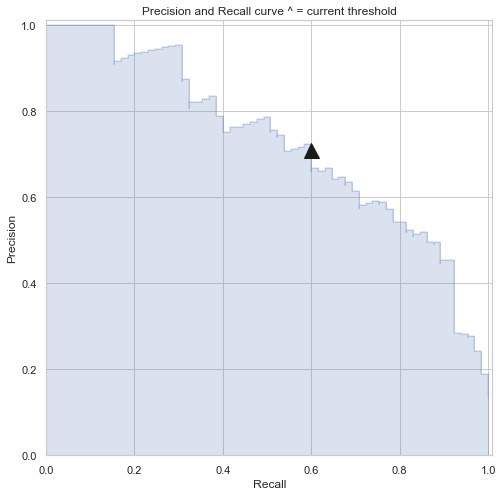

In [128]:
# Plot the precision-recall curve of the logistic regression model for the sarcasm data for the threshold = 0.5

precision_recall_threshold(p, r, thresholds, t=0.5)

Average precision score: 0.73


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.73')

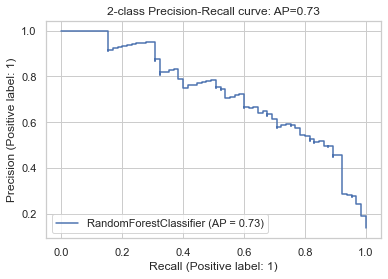

In [113]:
# Calculate the average precision score from predictions based on the best model and generate a precision-recall curve

RF_y_pred = RF.predict_proba(X_test)[:,1]
average_precision = average_precision_score(y_test, RF_y_pred)

print('Average precision score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(RF, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-rec

# Determine the false positives and false negatives based off the predictions made using LogisticRegressionCV
fp = X_test[y_test < RF_y_pred_binary]
fn = X_test[y_test > RF_y_pred_binary]

# Determine predicted probabilites for false positives and false negatives
a = RF_y_pred[y_test < RF_y_pred_binary]
b = RF_y_pred[y_test > RF_y_pred_binary]

# Convert false negative and false positives from series to data frame
#fp = fp.to_frame()
#fn = fn.to_frame()

# Add Predictive Probabilities as a Column
fp['pred_prob'] = a
fn['pred_prob'] = b

# Sort by Predictive Probabilities
fp = fp.sort_values(by=['pred_prob'], ascending=False)
fn = fn.sort_values(by=['pred_prob'] )

# Business Scenario One: Maximize the Red Wine Model's Ability to Detect High Quality Wines


In [176]:
# Identify the threshold associated with the largest fbeta score
 
# Initialize an empty list to store fbeta scores
fbeta_points = []
# Define the starting largest score
largest_score = 0

# Loop through the array of threshold values to test
for t in thresholds:
    # Assign new binary class based on the new threshold
    adjusted_y_pred_scenario_one = adjusted_classes(RF_y_pred, t=t)
    # Calculate the new recall score based on the new assignments for the new threshold
    #  beta >1 which favors recall and beta <1 favors precision
    new_balance = fbeta_score(y_test, adjusted_y_pred_scenario_one, average='micro', beta = 10) # 'micro' calculates metrics globally by counting the total true...
    #...positives, false negatives and false positives
    # Append the new recall score to the list
    fbeta_points.append(new_balance)
    # Determine if the new recall score is the largest, and if so assign the score and threshold
    if new_balance > largest_score:
        largest_score = new_balance
        thresh = t
        #print(largest_score,thresh)
print("The largest fbeta score of",round((largest_score),4),"occurs at a threshold value of:",thresh)    
        
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html?highlight=fbeta

The largest fbeta score of 0.9146 occurs at a threshold value of: 0.502


In [171]:
# Classification Report for the business scenario one - maximizing fbeta score and minimizing false negatives

print("Classification Report for the Business Application - Complementing Sentiment Analysis:\n",classification_report(adjusted_classes(RF_y_pred, 0.502), y_test))
print("Confusion Matrix for the Business Application - Complementing Sentiment Analysis:\n",confusion_matrix(y_test, adjusted_classes(RF_y_pred, 0.502)))

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Classification Report for the Business Application - Complementing Sentiment Analysis:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       426
           1       0.60      0.72      0.66        54

    accuracy                           0.91       480
   macro avg       0.78      0.83      0.80       480
weighted avg       0.92      0.91      0.92       480

Confusion Matrix for the Business Application - Complementing Sentiment Analysis:
 [[400  15]
 [ 26  39]]


In [172]:
# Convert the classification report for the business application - complementing sentiment analysis into a DF

report = classification_report(adjusted_classes(RF_y_pred,t=0.50),y_test,output_dict=True)
df_cr = pd.DataFrame(report)
df_cr

# Reference: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

,0,1,accuracy,macro avg,weighted avg
precision,0.961446,0.600000,0.9125,0.780723,0.920030
recall,0.938824,0.709091,0.9125,0.823957,0.912500
f1-score,0.950000,0.650000,0.9125,0.800000,0.915625
support,425.000000,55.000000,0.9125,480.000000,480.000000


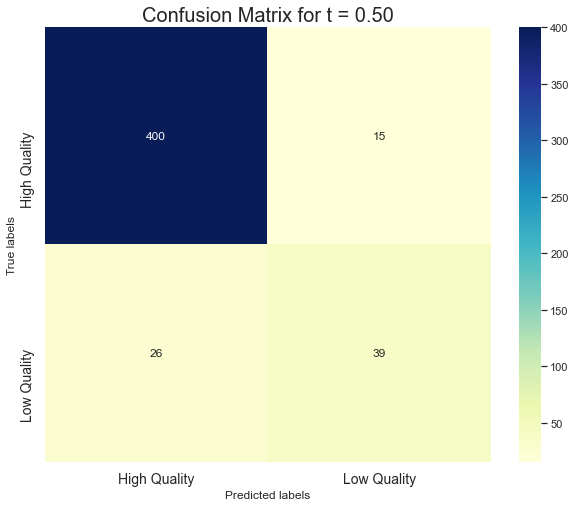

In [174]:
# Confusion matrix figure for the business application - complementing sentiment analysis     

matrix_scenario_one = confusion_matrix(y_test, adjusted_classes(RF_y_pred, t=0.502))

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(matrix_scenario_one, annot=True, ax = ax, fmt='g',cmap = 'YlGnBu'); # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for t = 0.50', fontsize=20) 
ax.xaxis.set_ticklabels(['High Quality', 'Low Quality'], fontsize = 14) 
ax.yaxis.set_ticklabels(['High Quality', 'Low Quality'], fontsize = 14)
plt.savefig('cm_t58.png')

# Reference (sns heatmap): https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# Reference (sns heatmap): https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

ValueError: x and y must have same first dimension, but have shapes (100,) and (178,)

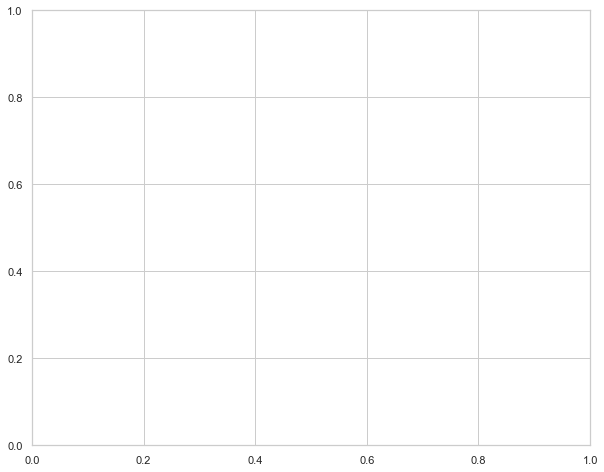

In [215]:
# Generate a figure showing variation in fbeta scores along with threshold values

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
plt.plot(thresholds, fbeta_points, color='blue', label = 'fbeta') #recall_points
#plt.plot(thresholds, balanced_accuracy_points, color='purple', label = "Balanced Accuracy")
plt.title('Red Wine Model fbeta Curve', fontsize =20)
plt.legend('fbeta')
plt.xlabel('Threshold', fontsize = 16)
plt.axvline(x=.58, color='red') # check for value
plt.text(.54,.53,'Optimal Threshold for fbeta: 0.50 ',rotation=90, fontsize = 16)
#plt.axvline(x=.5, color='black') # check for value
#plt.text(.48,.73,'Optimal Threshold Balanced Acc.',rotation=90)
plt.ylabel('fbeta Score', fontsize = 16)
plt.legend(loc='upper left', fontsize  = 16)
plt.savefig('fbeta_curve.png')
plt.show()

# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb 

The largest f1 score of 0.6667 occurs at a threshold value of: 0.29


Classification Report for Business Scenario Three :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       415
           1       0.56      0.83      0.67        65

    accuracy                           0.89       480
   macro avg       0.76      0.86      0.80       480
weighted avg       0.92      0.89      0.90       480

Confusion Matrix for Business Scenario Three:
 [[372  43]
 [ 11  54]]


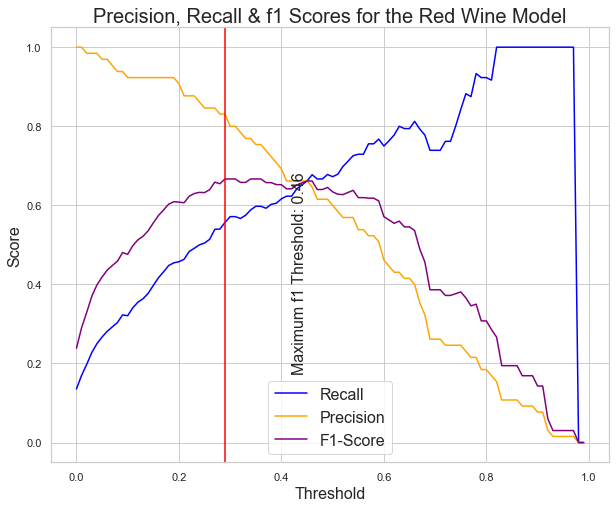

# Business Scenario Two: Maximize the Red Wine Mode's predictions, by minimizing False Positives and False Negatives


In [177]:
# Adjust class predictions based on the prediction threshold (t)

def adjusted_classes(RF_y_pred, t):
    
    return [1 if y >= t else 0 for y in RF_y_pred]

# Reference: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb

In [209]:
# Calculate accuracy score based on the default threshold = 0.5

accuracy_score(y_test, RF_y_pred_binary)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

0.9145833333333333

In [210]:
# Calculate balanced accuracy score based on the default threshold = 0.5

balanced_accuracy_score(y_test, RF_y_pred_binary)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

0.7819277108433735

In [180]:
# Return evenly spaced array of values for testing accuracy and balanced accuracy values at different thresholds

thresholds=np.arange(0,1,.01)

# Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html

In [182]:
# Generate an array of sarcasm probability scores for each tweet

RF_y_pred = RF.predict_proba(X_test)[:,1]

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba

In [183]:
# Identify the threshold associated with the largest accuracy score

# Initialize an empty list to store accuracy scores
accuracy_points = []
# Define the starting largest score
largest_score = 0

# Loop through the array of theshold values to test
for t in thresholds:
    # Assign new classes based on the new threshold
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=t)
    # Calculate the new accuracy score based on the new assignments for the new threshold
    new_balance = accuracy_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    accuracy_points.append(new_balance)
    # Determine if the new accuracy score is the largest, and if so assign the score and threshold
    if new_balance > largest_score:
        largest_score = new_balance
        thresh = t
        #print(largest_score,thresh)
print("The largest Accuracy Score of",round((largest_score),4),"occurs at a threshold value of:",thresh)    
        
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb     

The largest Accuracy Score of 0.9125 occurs at a threshold value of: 0.54


In [184]:
# Identify the threshold associated with the largest balanced accuracy score

# Initialize an empty list to store balanced accuracy scores
balanced_accuracy_points = []
# Define the starting largest score
largest_score = 0

# Loop through the array of theshold values to test
for t in thresholds:
    # Assign new classes based on the new threshold
    adjusted_y_pred = adjusted_classes(RF_y_pred, t=t)
    # Calculate the new accuracy score based on the new assignments for the new threshold
    new_balance = balanced_accuracy_score(y_test, adjusted_y_pred)
    # Append the new accuracy score to the list
    balanced_accuracy_points.append(new_balance)
    # Determine if the new accuracy score is the largest, and if so assign the score and threshold
    if new_balance > largest_score:
        largest_score = new_balance
        thresh = t
        #print(largest_score,thresh)
print("The largest Balanced Accuracy Score of",round((largest_score),4),"occurs at a threshold value of:",thresh)   

# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb        
            

The largest Balanced Accuracy Score of 0.8748 occurs at a threshold value of: 0.19


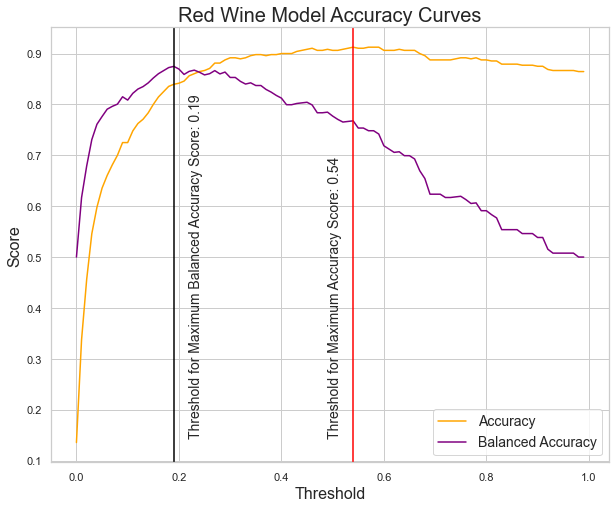

In [214]:
# Generate a figure showing variation in accuracy and balanced accuracy along with threshold values

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
plt.plot(thresholds, accuracy_points, color='orange', label = 'Accuracy')
plt.plot(thresholds, balanced_accuracy_points, color='purple', label = "Balanced Accuracy")
plt.title('Red Wine Model Accuracy Curves', fontsize =20)
plt.legend(('Accuracy', 'Balanced Accuracy'))
plt.xlabel('Threshold', fontsize = 16)
plt.axvline(x=.54, color='red') # check for value
plt.text(.49,.15,'Threshold for Maximum Accuracy Score: 0.54',rotation=90, fontsize = 14)
plt.axvline(x=.19, color='black') # check for value
plt.text(.22,.15,'Threshold for Maximum Balanced Accuracy Score: 0.19',rotation=90, fontsize=14)
plt.ylabel('Score', fontsize = 16)
plt.legend(loc='best', fontsize  = 14)
plt.savefig('accuracy_curves.png')
plt.show()

# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone1_Beer_Rating_Predictor/MachineLearning.ipynb        

In [197]:
print('Highest Accuracy: ', accuracy_points[54])
adjusted_y_pred = adjusted_classes(RF_y_pred, t=.54)
print(metrics.confusion_matrix(y_test, adjusted_y_pred))

print('\nHighest Balanced Accuracy: ', balanced_accuracy_points[19])
adjusted_y_pred = adjusted_classes(RF_y_pred, t=.19)
print(metrics.confusion_matrix(y_test, adjusted_y_pred))


Highest Accuracy:  0.9125
[[401  14]
 [ 28  37]]

Highest Balanced Accuracy:  0.8747914735866543
[[343  72]
 [  5  60]]


When applying the model on new alcohol with new feature data, you want the model to be as accurate as possible. To determine this I gauged the model using accuracy and confusion matrices. I wanted the least number of mispredictions (false negatives, false positives). The threshold level of .54 provides the best results with an accuary of .9125. in total there are 42 mispredictions. 28 False Negatives and 14 False positives.

However, a point of emphasis to be made is that balanced accuracy is a more appropriate metric for this because the data is unbalanced. For this reason if you'd like a predictor that overall performs better based on the unbalanced data, you should stick to the 0.5 threshold.

